# Funnel Analysis Workings

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plotly
from plotly.offline import plot
import plotly.graph_objs as go
from ipynb.fs.full.functions import create_funnel_df, group_funnel_dfs, plot_stacked_funnel
sns.set(rc={'figure.figsize':(25, 8)})
%matplotlib inline

# import dataset and view head
df = pd.read_csv('data/yoco/capital_events_case_study.csv')

# set timestamp to correct data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Remove nulls as there are only 5 a very small percentage
df=df.dropna()

# Dop duplicate rows as there is only 1
df.drop_duplicates(inplace=True)

# filter frame to Aug, Sep & Oct only - full months analysis only
df = df[(df['timestamp'] >= '2020-08-01') & (df['timestamp'] <= '2020-10-31')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20983 entries, 0 to 24774
Data columns (total 4 columns):
timestamp             20983 non-null datetime64[ns]
event                 20983 non-null object
user_id               20983 non-null object
context_os_version    20983 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 819.6+ KB


### Use what we learned in click analysis and map events for end users ease of use

In [20]:
# copy events column
df['event_name'] = df['event']
# Replace multiple values with multiple new values for an individual DataFrame column:
oldnames = ['pos_home_capital_card_pressed',
            'pos_capital_button_let_me_know',
            'pos_capital_button_get_cash_advance',
            'pos_capital_button_continue',
            'pos_capital_button_accept_offer',
            'pos_capital_link_view_offer_contract',
            'pos_capital_link_view_offer_tos',
            'pos_capital_button_decline_offer',
            'pos_capital_button_get_more_capital']

newnames = ['Merchants Opening Capital Tab',
           'Let me know Button clicked',
           'Get cash advance Button clicked',
           'Continue clicked',
           'Accept Offer clicked',
           'View Contract clicked',
           'Read full agreement clicked',
           'Decline Offer clicked',
           'Get more capital clicked']


df['event_name'] = df['event_name'].replace(oldnames,newnames)

### Define the critical paths we want to analyse in the funnel

In [21]:
accept_steps = ['Merchants Opening Capital Tab','Get cash advance Button clicked','Continue clicked','Accept Offer clicked','View Contract clicked']
accept_steps_two = ['Get cash advance Button clicked','Continue clicked','Accept Offer clicked','View Contract clicked']

decline_steps = ['pos_home_capital_card_pressed','pos_capital_button_get_cash_advance','pos_capital_button_continue','pos_capital_button_decline_offer']

### Use our functions to create funnel dataframes and then plot in plotly - note this produces a temporary html

In [22]:
create_funnel_df(df, accept_steps)

,step,val,pct,val-1,pct_from_first
0,Merchants Opening Capital Tab,3732,100,NaN,100
1,Get cash advance Button clicked,341,9,3732.0,9
2,Continue clicked,251,73,341.0,6
3,Accept Offer clicked,215,85,251.0,5
4,View Contract clicked,108,50,215.0,2


In [23]:
create_funnel_df(df, accept_steps, from_date='2020-08-01', to_date='2020-08-31')

,step,val,pct,val-1,pct_from_first
0,Merchants Opening Capital Tab,1537,100,NaN,100
1,Get cash advance Button clicked,216,14,1537.0,14
2,Continue clicked,169,78,216.0,10
3,Accept Offer clicked,147,86,169.0,9
4,View Contract clicked,69,46,147.0,4


In [24]:
create_funnel_df(df, accept_steps, from_date='2020-09-01', to_date='2020-09-30')

,step,val,pct,val-1,pct_from_first
0,Merchants Opening Capital Tab,1064,100,NaN,100
1,Get cash advance Button clicked,62,5,1064.0,5
2,Continue clicked,46,74,62.0,4
3,Accept Offer clicked,42,91,46.0,3
4,View Contract clicked,27,64,42.0,2


In [25]:
create_funnel_df(df, accept_steps, from_date='2020-10-01', to_date='2020-10-31')

,step,val,pct,val-1,pct_from_first
0,Merchants Opening Capital Tab,1041,100,NaN,100
1,Get cash advance Button clicked,56,5,1041.0,5
2,Continue clicked,29,51,56.0,2
3,Accept Offer clicked,21,72,29.0,2
4,View Contract clicked,9,42,21.0,0


In [26]:

fig = plot_stacked_funnel(df, accept_steps)
plot(fig)

# when running the monthly plots with date range

# from chart_studio.plotly import plotly
# from plotly.offline import plot
# import plotly.graph_objs as go
# fig = plot_stacked_funnel(df, accept_steps, from_date='2020-10-01', to_date='2020-10-31')
# plot(fig)

'temp-plot.html'

### Update the critical path and create funnel frames on the new steps

In [27]:
create_funnel_df(df, accept_steps_two)

,step,val,pct,val-1,pct_from_first
0,Get cash advance Button clicked,351,100,NaN,100
1,Continue clicked,258,73,351.0,73
2,Accept Offer clicked,222,86,258.0,63
3,View Contract clicked,113,50,222.0,32


In [28]:
create_funnel_df(df, accept_steps_two, from_date='2020-08-01', to_date='2020-08-31')

,step,val,pct,val-1,pct_from_first
0,Get cash advance Button clicked,110,100,NaN,100
1,Continue clicked,78,70,110.0,70
2,Accept Offer clicked,69,88,78.0,62
3,View Contract clicked,37,53,69.0,33


In [29]:
create_funnel_df(df, accept_steps_two, from_date='2020-09-01', to_date='2020-09-30')

,step,val,pct,val-1,pct_from_first
0,Get cash advance Button clicked,94,100,NaN,100
1,Continue clicked,76,80,94.0,80
2,Accept Offer clicked,64,84,76.0,68
3,View Contract clicked,33,51,64.0,35


In [30]:
create_funnel_df(df, accept_steps_two, from_date='2020-10-01', to_date='2020-10-31')

,step,val,pct,val-1,pct_from_first
0,Get cash advance Button clicked,136,100,NaN,100
1,Continue clicked,94,69,136.0,69
2,Accept Offer clicked,79,84,94.0,58
3,View Contract clicked,35,44,79.0,25


In [13]:
fig = plot_stacked_funnel(df, accept_steps_two)
plot(fig)

# when running the monthly plots with date range

# from chart_studio.plotly import plotly
# from plotly.offline import plot
# import plotly.graph_objs as go
# fig = plot_stacked_funnel(df, accept_steps_two, from_date='2020-10-01', to_date='2020-10-31')
# plot(fig)

'temp-plot.html'

### Create a new column and tiers for ios versions, making it easier to analyse and build out a stacked funnel

In [31]:
# Lets create tiers / cohorts for os versions
df['ios_int'] = df['context_os_version'].str.split('.').str[0].astype(int)

# create a list of our conditions
conditions = [
    (df['ios_int'] < 11),
    (df['ios_int'] >= 11) & (df['ios_int'] < 12),
    (df['ios_int'] >= 12) & (df['ios_int'] < 13),
    (df['ios_int'] >= 13) & (df['ios_int'] < 14),
    (df['ios_int'] >= 14)
    ]

# create a list of the values we want to assign for each condition
values = ['ios_10', 'ios_11', 'ios_12', 'ios_13', 'ios_14']

# create a new column and use np.select to assign values to it using our lists as arguments
df['ios_tier'] = np.select(conditions, values)
df.head()

,timestamp,event,user_id,context_os_version,event_name,ios_int,ios_tier
0,2020-08-01 04:22:45.924,pos_home_capital_card_pressed,1560415889593-99b63968-1017-4588-a4e5-a7b48ce6...,11.1.2,Merchants Opening Capital Tab,11,ios_11
1,2020-08-01 05:18:05.086,pos_home_capital_card_pressed,1471697083279-b783deca-88d9-4f97-9e9a-bf9dad6c...,13.6,Merchants Opening Capital Tab,13,ios_13
2,2020-08-01 06:37:40.708,pos_home_capital_card_pressed,1534411372475-1f8ec9b3-4786-4afb-a9af-008dc86f...,13.6,Merchants Opening Capital Tab,13,ios_13
3,2020-08-01 08:14:49.313,pos_home_capital_card_pressed,1594410129560-67427b34-cdd7-4632-8c21-cc1bcce3...,13.5.1,Merchants Opening Capital Tab,13,ios_13
4,2020-08-01 08:55:21.598,pos_home_capital_card_pressed,1574670688114-0cbf4e3c-cf23-4250-923f-540a0a43...,13.5.1,Merchants Opening Capital Tab,13,ios_13


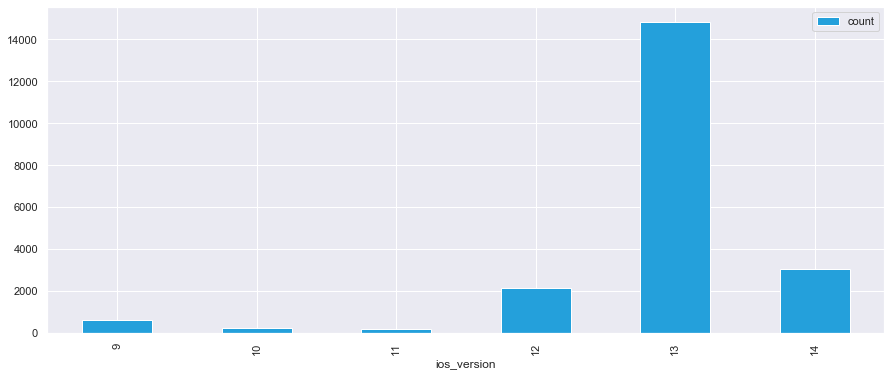

In [32]:
iosdf = df.groupby( [ "ios_int"] )['user_id'].count().reset_index()
iosdf.columns = ['ios_version', 'count']
iosdf = iosdf.set_index('ios_version')
iosdf.plot.bar(figsize=(15, 6),color='#24a0db')

In [17]:
# make a df for 10, 11 and 12
# filter df for only events in the steps list
ios_old = ['ios_10', 'ios_11', 'ios_12']
ios_older = df[df['ios_tier'].isin(ios_old)]

fig = plot_stacked_funnel(ios_older, accept_steps, col='ios_tier')
plot(fig)

'temp-plot.html'

In [18]:
# make a df for 13 & 14
# filter df for only events in the steps list
ios_new = ['ios_13', 'ios_14']
ios_new = df[df['ios_tier'].isin(ios_new)]

fig = plot_stacked_funnel(ios_new, accept_steps, col='ios_tier')
plot(fig)

'temp-plot.html'